In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
# importing sys
import sys
# adding helper_func to the system path
sys.path.insert(0, '../helper_functions/')
# importing actual functions
from helper_functions import character_df, fillna_centrl_tendcy, null_reminders,pre_process
pd.set_option('display.max_columns', None)

In [27]:
import json

In [28]:
# importing geographical libraries
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import plotly.io as pio

In [85]:
building_eda = pd.read_csv('../../Data/Complete_N_Cleaned.csv')
building_eda.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,1,1,9,288,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,1,0,0,0,damaged_used_in_risk,3,major_repair,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,1,0,0,0,damaged_repaired_and_used,5,reconstruction,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,0,0,0,0,damaged_repaired_and_used,2,minor_repair,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,0,0,0,0,damaged_repaired_and_used,2,minor_repair,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,0,0,0,0,damaged_repaired_and_used,1,minor_repair,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [86]:
# need to map the districts to the actual name not just the numerical value
ward_district_mapping = pd.read_csv('../../Data/building_damage_assessment_building_ownership_and_use_building_structure/ward_vdcmun_district_name_mapping.csv')
district_names = dict(zip(ward_district_mapping.district_id, ward_district_mapping.district_name))
muni_names = dict(zip(ward_district_mapping.ward_id, ward_district_mapping.vdcmun_name))
ward_district_mapping['district_name']= ward_district_mapping['district_name'].str.lower()
building_eda['dist_nm'] = building_eda['district_id'].apply(lambda x: district_names[x])
building_eda['muni_nm'] = building_eda['ward_id'].apply(lambda x: muni_names[x])
# formatting details
building_eda['dist_nm'] = building_eda['dist_nm'].str.lower()
building_eda['muni_nm'] = building_eda['muni_nm'].str.lower()

building_eda[['district_id','dist_nm','muni_nm','ward_id']].head()

,district_id,dist_nm,muni_nm,ward_id
0,12,okhaldhunga,siddhicharan municipality,120703
1,12,okhaldhunga,siddhicharan municipality,120703
2,12,okhaldhunga,siddhicharan municipality,120703
3,12,okhaldhunga,siddhicharan municipality,120703
4,12,okhaldhunga,siddhicharan municipality,120703


In [87]:
# setting indexes for concatenation later
building_eda.set_index('building_id',inplace=True)
print(building_eda.index[:4])
building_eda.head()

Int64Index([120101000011, 120101000021, 120101000031, 120101000041], dtype='int64', name='building_id')


,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,dist_nm,muni_nm
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
120101000011,12,1207,120703,1,1,9,288,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,1,0,0,0,damaged_used_in_risk,3,major_repair,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0,okhaldhunga,siddhicharan municipality
120101000021,12,1207,120703,1,1,15,364,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,1,0,0,0,damaged_repaired_and_used,5,reconstruction,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0,okhaldhunga,siddhicharan municipality
120101000031,12,1207,120703,1,1,20,384,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,0,0,0,0,damaged_repaired_and_used,2,minor_repair,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0,okhaldhunga,siddhicharan municipality
120101000041,12,1207,120703,1,1,20,312,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,0,0,0,0,damaged_repaired_and_used,2,minor_repair,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0,okhaldhunga,siddhicharan municipality
120101000051,12,1207,120703,1,1,30,308,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,0,0,0,0,damaged_repaired_and_used,1,minor_repair,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0,okhaldhunga,siddhicharan municipality


Looking at 110 different municipalities: 

In [11]:
building_eda['vdcmun_id'].nunique()

110

In [12]:
ward_district_mapping.head()

,ward_id,vdcmun_id,vdcmun_name,district_id,district_name
0,120101,1201,Champadevi Rural Municipality,12,okhaldhunga
1,120102,1201,Champadevi Rural Municipality,12,okhaldhunga
2,120103,1201,Champadevi Rural Municipality,12,okhaldhunga
3,120104,1201,Champadevi Rural Municipality,12,okhaldhunga
4,120105,1201,Champadevi Rural Municipality,12,okhaldhunga


In [13]:
print(building_eda['dist_nm'].shape)
building_eda['dist_nm'].unique()

(762106,)


array(['Okhaldhunga', 'Sindhuli', 'Ramechhap', 'Dolakha', 'Sindhupalchok',
       'Kavrepalanchok', 'Nuwakot', 'Rasuwa', 'Dhading', 'Makwanpur',
       'Gorkha'], dtype=object)

In [17]:
nepal_districs = json.load(open('../../Data/geo_json_files/mesaugat-geoJSON-Nepal-37f73c5/nepal-districts-new.geojson','r'))
nepal_wards = json.load(open('../../Data/geo_json_files/mesaugat-geoJSON-Nepal-37f73c5/nepal-wards.geojson','r'))

In [18]:
nepal_districs_old = json.load(open('../../Data/geo_json_files/mesaugat-geoJSON-Nepal-37f73c5/nepal-districts.geojson','r'))
print(nepal_districs_old['features'][0].keys())
nepal_districs_old['features'][0]['properties']

dict_keys(['type', 'id', 'properties', 'geometry'])


{'DISTRICT': 'HUMLA'}

In [19]:
nepal_districs_old['features'][2]['properties']

{'DISTRICT': 'BAJHANG'}

In [20]:
# so will plot everything but the two districts that I do not have data for and will inspect again on municipallity level later on
# for future ref: building_eda['muni_nm'] = building_eda['ward_id'].apply(lambda x: muni
# looking at what is in the new district map 
print(building_eda.shape)

# represents a particular state
districs_old = {}
for feature in nepal_districs_old['features']:
    #print(feature['id'])
    #print(feature['properties']['DISTRICT'].lower())
    districs_old[feature['properties']['DISTRICT'].lower()  ] = feature['id']
# looking at what is NOT in the old district listing 
list_of_districts= []
not_in_list = []
cnt=0
for obs in building_eda['dist_nm'].str.lower():
    if obs not in set(districs_old.keys()):
        not_in_list.append(obs)
        cnt+=1
print('districts not in both: ',set(not_in_list))
print('num of times in the dataset: ',cnt)
print('differece after dropped: ',building_eda.shape[0]-cnt)

(762106, 45)
districts not in both:  {'kavrepalanchok'}
num of times in the dataset:  98019
differece after dropped:  664087


In [22]:
plotable_buildings = building_eda.drop(building_eda[building_eda['dist_nm']=='kavrepalanchok'].index).reset_index()
plotable_buildings['id'] = plotable_buildings['dist_nm'].apply(lambda x: districs_old[x])
plotable_buildings.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,dist_nm,muni_nm,id
0,120101000011,12,1207,120703,1,1,9,288,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,1,0,0,0,damaged_used_in_risk,3,major_repair,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0,okhaldhunga,siddhicharan municipality,55
1,120101000021,12,1207,120703,1,1,15,364,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,1,0,0,0,damaged_repaired_and_used,5,reconstruction,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0,okhaldhunga,siddhicharan municipality,55
2,120101000031,12,1207,120703,1,1,20,384,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,0,0,0,0,damaged_repaired_and_used,2,minor_repair,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0,okhaldhunga,siddhicharan municipality,55
3,120101000041,12,1207,120703,1,1,20,312,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,0,0,0,0,damaged_repaired_and_used,2,minor_repair,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0,okhaldhunga,siddhicharan municipality,55
4,120101000051,12,1207,120703,1,1,30,308,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,0,0,0,0,damaged_repaired_and_used,1,minor_repair,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0,okhaldhunga,siddhicharan municipality,55


In [33]:
# so that it renders on a diff tab (jupyter lab crashes otherwise)
pio.renderers.default = 'chrome'    

In [46]:
# 
fig = px.choropleth(plotable_buildings,locations='id',geojson=nepal_districs_old,color='damage_grade',scope='asia',hover_name='dist_nm',)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [60]:
fig = px.choropleth_mapbox(plotable_buildings, geojson=nepal_districs_old, locations='id', color='damage_grade',
                           color_continuous_scale="Viridis",
                           range_color=(0, 4),
                           mapbox_style="carto-positron",
                           zoom=7,
                           opacity=0.5,center = {"lat": 27.711539475362535, "lon": 85.3249306241579},
                           labels={'damage_grade':'damge grade'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
for feature in nepal_muni['features']:
    #print(feature['id'])
    #print(feature['properties']['DISTRICT'].lower())
    districs_old[feature['properties']['DISTRICT'].lower()  ] = feature['id']

---
Look at municipality levelfor feature in nepal_districs_old['features']:
    #print(feature['id'])
    #print(feature['properties']['DISTRICT'].lower())
    districs_old[feature['properties']['DISTRICT'].lower()  ] = feature['id']

In [114]:
# so will plot everything but the two districts that I do not have data for and will inspect again on municipallity level later on
# for future ref: building_eda['muni_nm'] = building_eda['ward_id'].apply(lambda x: muni
# looking at what is in the new district map 
print(building_eda.shape)
nepal_muni = json.load(open('../../Data/geo_json_files/mesaugat-geoJSON-Nepal-37f73c5/nepal-municipalities.geojson','r'))

# represents a particular state
mun_old = {}
for feature in nepal_muni['features']:
    #print(feature)
    
    feature['id'] = feature['properties']['F_ID']
    mun_old[ feature['properties']['NAME']  ] =feature['id'] 

(762106, 45)


In [76]:
# nepal_muni[0]
print(nepal_muni['features'][0].keys())
nepal_muni['features'][0]['properties']

dict_keys(['type', 'properties', 'geometry'])


{'id': None,
 'F_ID': 104,
 'N_ID': 'bhaktapur-bhaktapur',
 'NAME': 'Bhaktapur',
 'LEVEL': 'Nagarpalika',
 'DISTRICT': 'Bhaktapur'}

In [92]:
nepal_muni['features'][1]['properties']['NAME']

'Madhyapur Thimi'

In [90]:
nepal_muni['features'][2]['properties']['F_ID']

343

In [129]:
print(type(mun_old))
mun_old
#Using a for loop to remove keys with Value as None
#[del mun_old[key] for key,v in mun_old.items() if is None]
for key, value in mun_old.items():
    if value is None:
        del mun_old[key]
mun_old_lower = {k.lower(): v for k, v in mun_old.items()}
# need to replace spaces with underscores
mun_old_lower = {k.lower().replace(' ','_'): v for k, v in mun_old.items()}

# looking at what format the building eda dataframe needs to be changed into
list(mun_old_lower)[:2]

<class 'dict'>


['bhaktapur', 'madhyapur_thimi']

In [126]:
building_eda['muni_nm'].head()

building_id
120101000011    siddhicharan municipality
120101000021    siddhicharan municipality
120101000031    siddhicharan municipality
120101000041    siddhicharan municipality
120101000051    siddhicharan municipality
Name: muni_nm, dtype: object

In [125]:
# looking at what is NOT in the old district listing 
list_of_mun= []
not_in_list = []
cnt=0
for obs in building_eda['muni_nm'].str.lower():
    if obs not in set(mun_old_lower):
        not_in_list.append(obs)
        cnt+=1
print('districts not in both: ',set(not_in_list))
print('num of times in the dataset: ',cnt)
print('differece after dropped: ',building_eda.shape[0]-cnt)

districts not in both:  {'dupcheshwor rural municipality', 'namobuddha municipality', 'rubi valley rural municipality', 'jugal rural municipality', 'kispang rural municipality', 'kailash rural municipality', 'kalinchowk rural municipality', 'thaha municipality', 'kakani rural municipality', 'makawanpurgadhi rural municipality', 'sunapati rural municipality', 'suryagadhi rural municipality', 'aarughat rural municipality', 'siddhicharan municipality', 'panchkhal municipality', 'chauri deurali rural municipality', 'phikkal rural municipality', 'likhu rural municipality', 'balephi rural municipality', 'champadevi rural municipality', 'choutara sangachowkgadhi municipality', 'bakaiya rural municipality', 'roshi rural municipality', 'ganga jamuna rural municipality', 'khiji demba rural municipality', 'ramechhap municipality', 'bhimeshwor municipality', 'marin rural municipality', 'khaniyabas rural municipality', 'gorkha municipality', 'manebhanjyang rural municipality', 'kamalamai municipali

In [95]:
building_eda['muni_id']=building_eda['muni_nm'].apply(lambda x: mun_old[x])

KeyError: 'siddhicharan municipality'

In [ ]:
plotable_buildings = building_eda.drop(building_eda[building_eda['dist_nm']=='kavrepalanchok'].index).reset_index()
plotable_buildings['id'] = plotable_buildings['dist_nm'].apply(lambda x: districs_old[x])
plotable_buildings.head()

---
stuff below might be useless

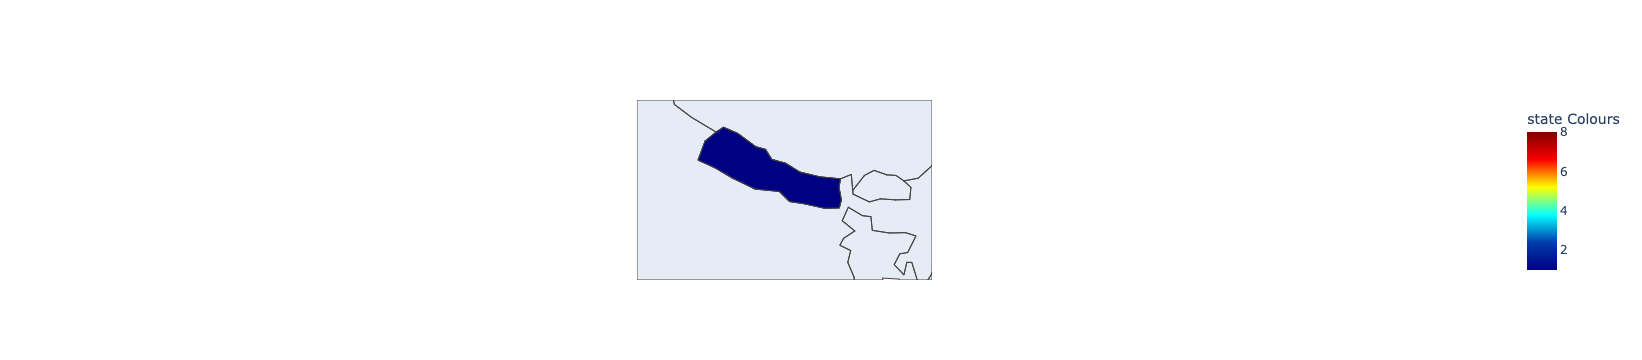

In [15]:
layout = dict(geo={'scope':'asia'})
import plotly.graph_objs as go
chmap = go.Figure(data=[data],layout=layout)
iplot(chmap)

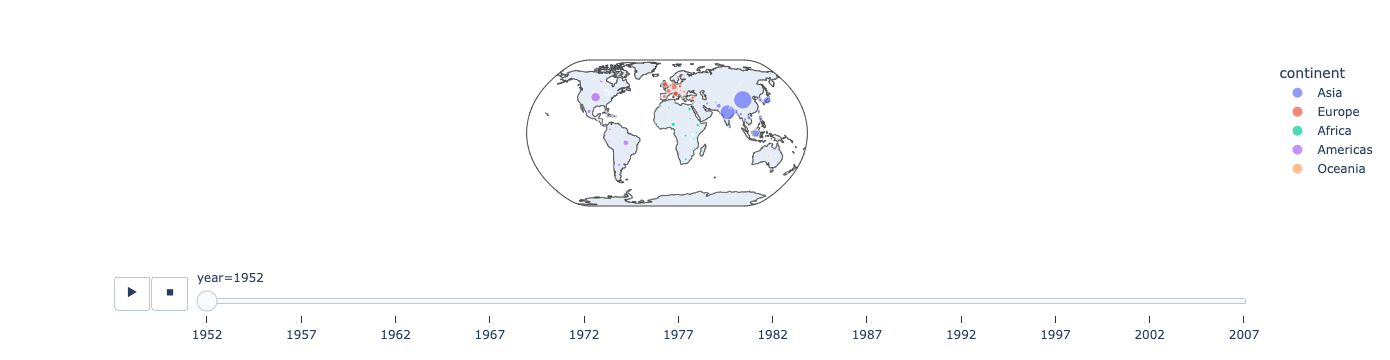

In [23]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter_geo(df, locations="iso_alpha", color="continent", hover_name="country", size="pop",
               animation_frame="year", projection="natural earth")
fig.show()

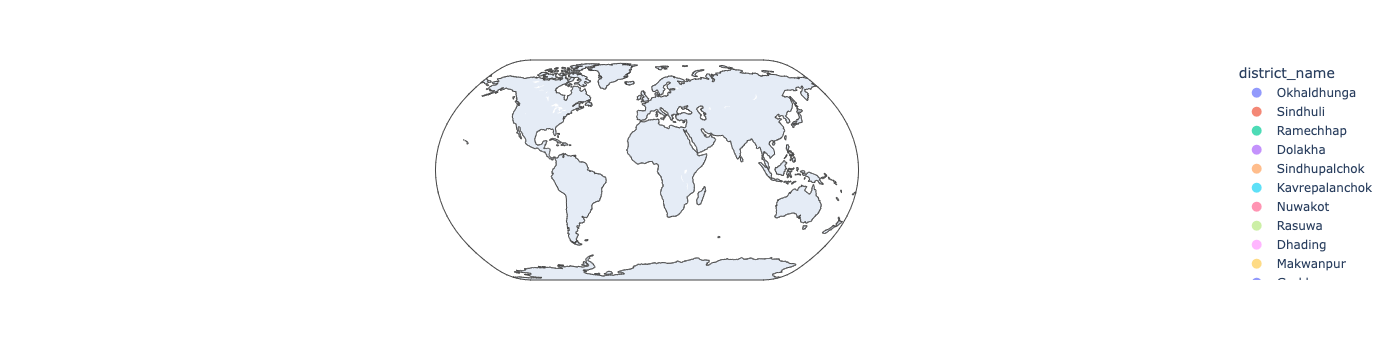

In [25]:
#ward_district_mapping

fig = px.scatter_geo(ward_district_mapping, locations="district_name", color="district_name", hover_name="district_name", size="ward_id",
            projection="natural earth")

fig.show()